<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0__2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n30-2.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,64.355606,42.156490,29.141952,0.781527,146.435574,145.001160,1.434414
1,0.0,1.0,37.365810,59.119179,66.584958,-2.466517,170.603430,172.661512,-2.058082
2,0.0,2.0,92.534224,41.556787,26.913367,-0.743278,170.261101,170.333032,-0.071932
3,0.0,3.0,80.791425,69.330371,94.786003,-0.910091,253.997708,254.637043,-0.639335
4,0.0,4.0,38.433987,63.363527,42.900654,0.434811,155.132980,154.296433,0.836547
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,89.147337,22.867679,46.857113,-1.357721,167.514409,167.767452,-0.253044
29996,999.0,26.0,74.129366,88.845130,68.889800,-0.576104,241.288193,241.782947,-0.494754
29997,999.0,27.0,88.919113,93.253896,28.390292,-1.963007,218.600294,220.320733,-1.720439
29998,999.0,28.0,69.868441,33.041984,28.078753,-1.001685,139.987493,139.993702,-0.006209


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    64.355606  42.156490  29.141952  ...  146.435574  145.001160  1.434414
      1.0    37.365810  59.119179  66.584958  ...  170.603430  172.661512 -2.058082
      2.0    92.534224  41.556787  26.913367  ...  170.261101  170.333032 -0.071932
      3.0    80.791425  69.330371  94.786003  ...  253.997708  254.637043 -0.639335
      4.0    38.433987  63.363527  42.900654  ...  155.132980  154.296433  0.836547
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   89.147337  22.867679  46.857113  ...  167.514409  167.767452 -0.253044
      26.0   74.129366  88.845130  68.889800  ...  241.288193  241.782947 -0.494754
      27.0   88.919113  93.253896  28.390292  ...  218.600294  220.320733 -1.720439
      28.0   69.868441  33.041984  28.078753  ...  139.987493  139.993702 -0.006209
      29.0   72.011193  33.584602  98.559039  ...  214.322347  213.469829  0.852518

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    64.355606  42.156490  29.141952  ...  146.435574  145.001160  1.434414
      1.0    37.365810  59.119179  66.584958  ...  170.603430  172.661512 -2.058082
      2.0    92.534224  41.556787  26.913367  ...  170.261101  170.333032 -0.071932
      3.0    80.791425  69.330371  94.786003  ...  253.997708  254.637043 -0.639335
      4.0    38.433987  63.363527  42.900654  ...  155.132980  154.296433  0.836547
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   89.147337  22.867679  46.857113  ...  167.514409  167.767452 -0.253044
      26.0   74.129366  88.845130  68.889800  ...  241.288193  241.782947 -0.494754
      27.0   88.919113  93.253896  28.390292  ...  218.600294  220.320733 -1.720439
      28.0   69.868441  33.041984  28.078753  ...  139.987493  139.993702 -0.006209
      29.0   72.011193  33.584602  98.559039  ...  214.322347  213.469829  0.852518

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,64.355606,42.156490,29.141952,0.781527,146.435574,145.001160,1.434414
1,0.0,1.0,37.365810,59.119179,66.584958,-2.466517,170.603430,172.661512,-2.058082
2,0.0,2.0,92.534224,41.556787,26.913367,-0.743278,170.261101,170.333032,-0.071932
3,0.0,3.0,80.791425,69.330371,94.786003,-0.910091,253.997708,254.637043,-0.639335
4,0.0,4.0,38.433987,63.363527,42.900654,0.434811,155.132980,154.296433,0.836547
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,89.147337,22.867679,46.857113,-1.357721,167.514409,167.767452,-0.253044
29996,999.0,26.0,74.129366,88.845130,68.889800,-0.576104,241.288193,241.782947,-0.494754
29997,999.0,27.0,88.919113,93.253896,28.390292,-1.963007,218.600294,220.320733,-1.720439
29998,999.0,28.0,69.868441,33.041984,28.078753,-1.001685,139.987493,139.993702,-0.006209


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    64.355606  42.156490  29.141952  ...  146.435574  145.001160  1.434414
      1.0    37.365810  59.119179  66.584958  ...  170.603430  172.661512 -2.058082
      2.0    92.534224  41.556787  26.913367  ...  170.261101  170.333032 -0.071932
      3.0    80.791425  69.330371  94.786003  ...  253.997708  254.637043 -0.639335
      4.0    38.433987  63.363527  42.900654  ...  155.132980  154.296433  0.836547
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   89.147337  22.867679  46.857113  ...  167.514409  167.767452 -0.253044
      26.0   74.129366  88.845130  68.889800  ...  241.288193  241.782947 -0.494754
      27.0   88.919113  93.253896  28.390292  ...  218.600294  220.320733 -1.720439
      28.0   69.868441  33.041984  28.078753  ...  139.987493  139.993702 -0.006209
      29.0   72.011193  33.584602  98.559039  ...  214.322347  213.469829  0.852518

[30000 rows x 7 columns]

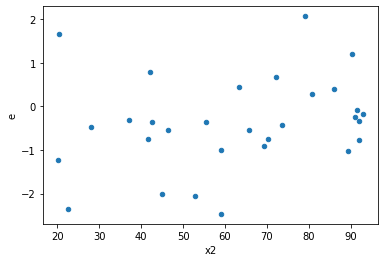

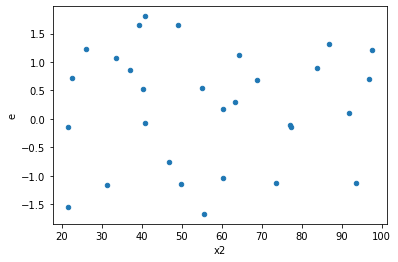

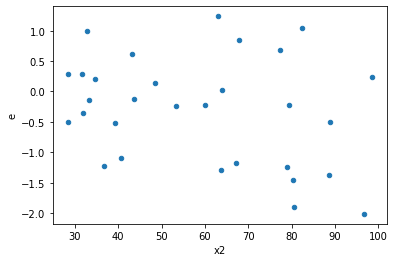

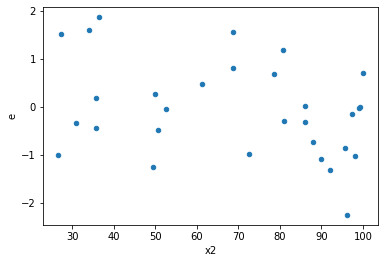

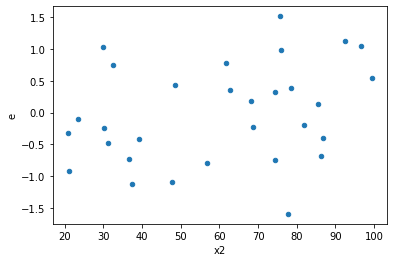

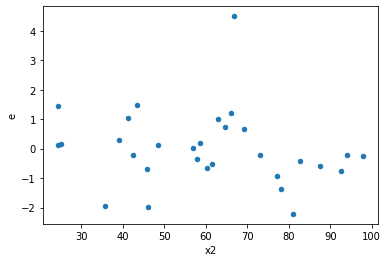

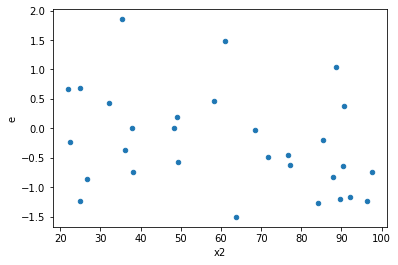

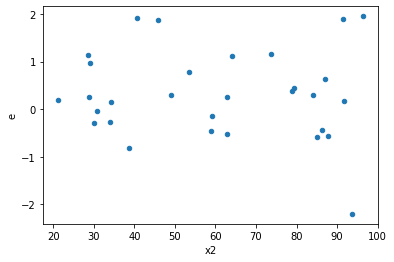

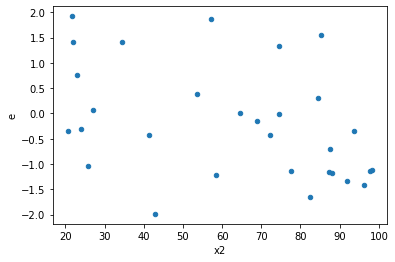

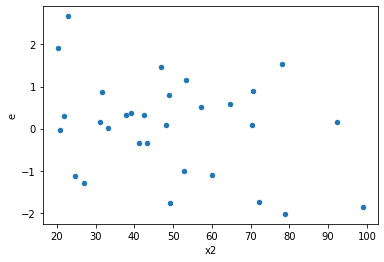

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,19.0,4.025943074775026,17.14051796734702,0.8051886149550052,0.9021325245972115,1.1203990069427692,0.7659008444335955,0.6170495777832022,0.38295042221679776,Reject001=1 : Homoscedasticity
2.0,11.0,13.0,4.750918238632843,14.46934934495445,0.43190165805753117,1.113026872688804,2.577037739782291,0.10772067653899331,0.9461396617305033,0.053860338269496655,Reject001=1 : Homoscedasticity
9.0,9.0,15.0,7.15137897013447,22.577428089017157,0.7945976633482744,1.5051618726011438,1.8942440206263569,0.2633666594910624,0.8683166702544688,0.1316833297455312,Reject001=1 : Homoscedasticity
16.0,6.0,18.0,2.048901929254344,18.821997554814246,0.341483654875724,1.0456665308230138,3.062127618387951,0.060625658415599304,0.9696871707922003,0.030312829207799652,Reject001=1 : Homoscedasticity
18.0,12.0,12.0,15.34375516407774,17.32729509445939,1.278646263673145,1.443941257871616,1.1292734346430036,0.8366546721520614,0.5816726639239693,0.4183273360760307,Reject001=1 : Homoscedasticity
23.0,12.0,12.0,10.50976510029239,11.196336965655066,0.8758137583576991,0.9330280804712555,1.0653270419282326,0.9145182261682963,0.5427408869158519,0.4572591130841481,Reject001=1 : Homoscedasticity
24.0,7.0,17.0,3.7901667300224577,18.110461942691106,0.5414523900032082,1.0653212907465357,1.967525327093345,0.2409918156150217,0.8795040921924892,0.12049590780751085,Reject001=1 : Homoscedasticity
25.0,11.0,13.0,10.010270930113153,19.68733071416355,0.9100246300102867,1.5144100549356578,1.6641418319837555,0.37956602737649403,0.810216986311753,0.18978301368824702,Reject001=1 : Homoscedasticity
32.0,13.0,11.0,9.401579544787838,11.48310209056535,0.7231984265221414,1.0439183718695773,1.443474340631211,0.548892311994762,0.725553844002619,0.274446155997381,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,19.0,4.025943074775026,17.14051796734702,0.8051886149550052,0.9021325245972115,1.1203990069427692,0.7659008444335955,Reject001=1 : Homoscedasticity
1.0,10.0,14.0,10.362081546601742,9.99900550251702,1.0362081546601742,0.7142146787512157,0.6892579213347759,0.5609203119160456,Reject001=1 : Homoscedasticity
2.0,11.0,13.0,4.750918238632843,14.46934934495445,0.43190165805753117,1.113026872688804,2.577037739782291,0.10772067653899331,Reject001=1 : Homoscedasticity
3.0,16.0,8.0,14.51666371031079,6.86790290111852,0.9072914818944243,0.858487862639815,0.9462095476167071,0.8748947100213452,Reject001=1 : Homoscedasticity
4.0,13.0,11.0,6.404101086839357,5.1208327058654115,0.4926231605261044,0.46553024598776466,0.9450027592908838,0.9108533953412216,Reject001=1 : Homoscedasticity
5.0,12.0,12.0,34.44416787819327,7.080038853200634,2.8703473231827723,0.5900032377667195,0.2055511655336877,0.010368721223889892,Reject001=1 : Homoscedasticity
6.0,13.0,11.0,9.099060504125445,7.70931994151618,0.6999277310865727,0.7008472674105618,1.0013137589541732,0.9887865864784176,Reject001=1 : Homoscedasticity
7.0,10.0,14.0,15.34333870683581,8.146052492734094,1.534333870683581,0.5818608923381496,0.3792270401219242,0.12840728332922371,Reject001=1 : Homoscedasticity
8.0,9.0,15.0,9.997685281963655,11.332986854327265,1.110853920218184,0.755532456955151,0.6801366437152746,0.5680534291470921,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      980
Reject001=0 : Heteroscedasticity     20
Name: Result_test, dtype: int64